In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd
import numpy as np
from sglm.helpers import filehelpers as fh, dfhelpers as dfh
from collections import defaultdict
from pathlib import Path

In [4]:
base_keys = list({
                'gACH':(0,0),
                'rDA':(0,0),
                'gDA':(0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndex':(0,0),
                'photometrySideInIndexr':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                'photometryCenterInIndex':(0,0),
                'photometryCenterOutIndex':(0,0),
                'photometrySideInIndexAA':(0,0),
                'photometrySideInIndexAa':(0,0),
                'photometrySideInIndexaA':(0,0),
                'photometrySideInIndexaa':(0,0),
                'photometrySideInIndexAB':(0,0),
                'photometrySideInIndexAb':(0,0),
                'photometrySideInIndexaB':(0,0),
                'photometrySideInIndexab':(0,0),
                'photometrySideOutIndex':(0,0),
                'sl': (0,0),
                'spnnrOff': (0,0),
                }.keys())
# base_keys

used_run_majors = ['base_simple', 'base_words', '_to_']


In [5]:
# load_folder = base_location / Path(r'Figure_6_g1')
# h5_beta_locations = str((load_folder / Path(r'all/glu_run_*/coefs/*_best_coeffs.h5')).resolve())

# out_folder = base_location / Path(r'final_outputs_glu_run')

In [6]:
h5_lst = defaultdict(list)
run_id_dct = defaultdict(list)

# base_location = Path(r'/Users/josh/Documents/Harvard/GLM/sabatinilab-glm/sglm/outputs')
base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old')

fig_folder_lst = [# ('Figure_1_2', 'f1*-ft'),
#                   ('Figure_3',   'f3*-ft'),
#                   ('Figure_4_g1',   'f4*-ft'),
#                   ('Figure_4_g2',   'f4*-ft'),
#                   ('Figure_5_g1',   'f5*-ft'),
#                   ('Figure_5_g2',   'f5*-ft'),
#                   ('Figure_5_g5',   'f5*-ft'),
#                    ('Figure_6_g1', 'glu_run_20221202-no-CO_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft-reduc_0-ft')
#                    ('Figure_6_g1', 'glu_run_20221202-30sft-paperfig_0-ft')
#                    ('Figure_6_g1-20sft', 'glu_run_20221212-20sft-paperfig_0-ft')
#                    ('Figure_6_g1-50sft', 'glu_run_20221213-50sft-paperfig_0-ft')
#                    ('Figure_6_g1--20_20sft', 'glu_run_20220109--20_20sft_0-ft')
    
                   ('Figure_1_2_g1--20_20sft', 'comp_run_20230409--20_20sft_0-ft'),
                   ('Figure_1_2_g1--20_20sft', 'comp_run_20230409--20_20sft_1-ft')
    
#                    ('Figure_7_g1--20_20sft', 'tet_run_20230403--20_20sft_0-ft'),
#                    ('Figure_7_g1--20_20sft', 'tet_run_20230403--20_20sft_1-ft')
                 ]

for fig_folder in fig_folder_lst:
    print('fig_folder', fig_folder)
    
    load_folder = base_location / Path(fig_folder[0])
    # load_folder = base_location / Path(r'tmp')
    h5_beta_locations = str((load_folder / Path('all') / Path(fig_folder[1]) / Path(r'coefs\*_best_coeffs.h5')).resolve())
    
    
    print(h5_beta_locations)
    


#     base_location = Path(r'C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs')

#     load_folder = base_location / Path(r'Figure_1_2')
#     h5_beta_locations = str((load_folder / Path(r'all\f1*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_3')
#     # h5_beta_locations = str((load_folder / Path(r'all\f3*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_4_g1')
#     # h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_4_g2')
#     # h5_beta_locations = str((load_folder / Path(r'all\f4*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_5_g1')
#     # h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())
#     # load_folder = base_location / Path(r'Figure_5_g2')
#     # h5_beta_locations = str((load_folder / Path(r'all\f5*-ft\coefs\*_best_coeffs.h5')).resolve())

#     out_folder = base_location / Path(r'final_outputs')

#     # h5_beta_locations = Path('/Users/josh/Dropbox (HMS)/jz/Tetanus/1194_1195_1214_1258_1259_2_best_coeffs.h5')
#     out_loc = str((out_folder).resolve())
#     h5_beta_locations = glob.glob(h5_beta_locations)


    subloc_out = Path(f'final_out_{fig_folder[1]}')
    out_folder = base_location / subloc_out

    out_loc = str((out_folder).resolve())
    h5_beta_locations = glob.glob(h5_beta_locations)

    fh.create_folder_if_not_exists(out_loc)
    
    h5_lst = defaultdict(list)
    for h5_coef_fn in h5_beta_locations:
        h5f = pd.HDFStore(h5_coef_fn)
        h5fk = h5f.keys()
        for key in h5fk:
#             print(key)
            resp = key.split('_')[0].replace('/', '')
            model_version = '_'.join(key.split('_')[2:]).split('_run_num')[0]
            model_version = model_version.replace('5_base_words_gDA_to_gACH', '5_base_words_rDA_to_gACH')
    #         print(resp, model_version)
            h5_df = pd.read_hdf(h5f, key).reset_index()
            
#             display(h5fk)
            
            h5_df['fn'] = h5_coef_fn
            h5_df['key'] = key
            h5_df = h5_df.set_index(['fn','key'])


            h5_df = h5_df.sort_values('channel_name')
            h5_df['channel'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[0])
            h5_df['run_num'] = h5_df['channel_name'].str.split('_').apply(lambda x: x[-1])

            h5_lst[(resp, model_version)].append(h5_df)
    #         h5_lst.append(h5_df)
    # concat = pd.concat(h5_lst, axis=0)

    fh.create_folder_if_not_exists(out_loc)



    a = None
    b = None

    h5_dfs = dict(h5_lst)
    for key in h5_dfs:
        run_major = '='.join(key)

        cont = True
        for runmajor in used_run_majors:
            if runmajor in run_major:
                cont = False
        if cont:
            continue

        val = h5_dfs[key]
        concat = pd.concat(val)

        all_kernels = []
        for base_key in base_keys:
            all_kernels += dfh.get_kernel_from_basename(base_key, list(concat.columns))


        gb_columns = ['mouse_id', 'channel', 'name']
        ak_unagg = concat.reset_index().set_index(['mouse_id', 'channel', 'name', 'run_num'])[all_kernels]

        ak_unagg.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-kernels_raw-{run_major}.csv').resolve()))

        kernels = ak_unagg.groupby(gb_columns).agg([np.mean, np.size, np.std])
        kernels = kernels.swaplevel(axis=1)

        ak = concat[all_kernels].copy()
        new_cols = [(dfh.shorten_col_name(_.split('_')[0]), int(_.split('_')[1])) for _ in ak.columns]



        ak.columns = pd.MultiIndex.from_tuples(new_cols)
        ak['1'] = 1
        akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()
        akgb.loc['sem'] = akgb.loc['std']/np.sqrt(akgb.loc['size'])
    #     akgb = akgb.loc[['mean', 'sem']]
        final_out = akgb.stack(1).unstack(0).copy()
        final_out.columns = ['_'.join(_) for _ in final_out.columns]

    #     if a is None:
    #         a = final_out
    #     else:
    #         b = final_out
    #         break

    #     print(final_out.shape)
        final_out.to_csv(str((Path(out_loc) / f'{load_folder.parts[-1]}-kernels-{run_major}.csv').resolve()))
        
#         display(final_out)

    #     break

fig_folder ('Figure_1_2_g1--20_20sft', 'comp_run_20230409--20_20sft_0-ft')
C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old\Figure_1_2_g1--20_20sft\all\comp_run_20230409--20_20sft_0-ft\coefs\*_best_coeffs.h5
Created directory: C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old\final_out_comp_run_20230409--20_20sft_0-ft


C:\Users\Josh\AppData\Local\Temp\ipykernel_23964\4244324082.py:139: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()


fig_folder ('Figure_1_2_g1--20_20sft', 'comp_run_20230409--20_20sft_1-ft')
C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old\Figure_1_2_g1--20_20sft\all\comp_run_20230409--20_20sft_1-ft\coefs\*_best_coeffs.h5
Created directory: C:\Users\Josh\Documents\GitHub\sabatinilab-glm\sglm\outputs-old\final_out_comp_run_20230409--20_20sft_1-ft


C:\Users\Josh\AppData\Local\Temp\ipykernel_23964\4244324082.py:139: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  akgb = ak.groupby('1').agg([np.mean, np.size, np.std]).stack().sort_index().droplevel(0).copy()


In [7]:
final_out

,CI_mean,CI_sem,CI_size,CI_std,CO_mean,CO_sem,CO_size,CO_std,SIAA_mean,SIAA_sem,...,SO_size,SO_std,sl_mean,sl_sem,sl_size,sl_std,spnnrOff_mean,spnnrOff_sem,spnnrOff_size,spnnrOff_std
-20,-0.100639,0.002496,10.0,0.007892,-0.028544,0.002033,10.0,0.006428,-0.066356,0.003634,...,10.0,0.006797,0.039061,0.001548,10.0,0.004896,-0.097667,0.007511,10.0,0.023751
-19,-0.203993,0.001906,10.0,0.006027,-0.030336,0.004051,10.0,0.012810,-0.060619,0.003359,...,10.0,0.010715,0.058693,0.002194,10.0,0.006939,-0.064157,0.007673,10.0,0.024265
-18,-0.216907,0.003398,10.0,0.010747,-0.024165,0.005865,10.0,0.018547,-0.058209,0.004696,...,10.0,0.011385,0.047824,0.002225,10.0,0.007036,-0.041908,0.008891,10.0,0.028117
-17,-0.202903,0.005109,10.0,0.016156,-0.032586,0.006135,10.0,0.019401,-0.024245,0.005859,...,10.0,0.012293,0.034237,0.001263,10.0,0.003993,-0.097568,0.008086,10.0,0.025570
-16,-0.205892,0.005365,10.0,0.016965,-0.018161,0.005076,10.0,0.016050,0.051032,0.006739,...,10.0,0.010571,0.021354,0.001682,10.0,0.005318,-0.078216,0.009245,10.0,0.029236
-15,-0.217691,0.004929,10.0,0.015588,-0.005211,0.005531,10.0,0.017489,0.142296,0.007938,...,10.0,0.010755,0.006787,0.002170,10.0,0.006863,-0.095501,0.009685,10.0,0.030626
-14,-0.230002,0.005470,10.0,0.017297,0.015153,0.005874,10.0,0.018577,0.254292,0.009098,...,10.0,0.008889,0.004205,0.001488,10.0,0.004704,-0.109846,0.006014,10.0,0.019019
-13,-0.216337,0.005136,10.0,0.016240,0.003159,0.005724,10.0,0.018100,0.388063,0.007991,...,10.0,0.008662,0.003068,0.001364,10.0,0.004312,-0.127878,0.007444,10.0,0.023539
-12,-0.194067,0.004309,10.0,0.013625,-0.013303,0.005741,10.0,0.018153,0.489247,0.007052,...,10.0,0.010770,0.002571,0.001792,10.0,0.005667,-0.125132,0.008486,10.0,0.026835
-11,-0.174187,0.004392,10.0,0.013889,-0.024651,0.005793,10.0,0.018320,0.505411,0.005404,...,10.0,0.009025,-0.000845,0.001724,10.0,0.005452,-0.109434,0.006757,10.0,0.021367


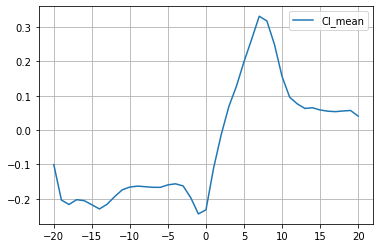

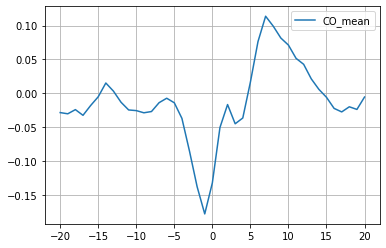

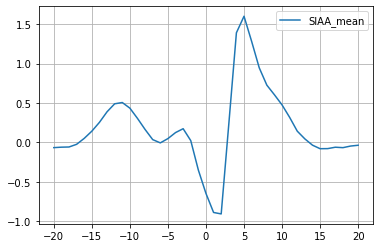

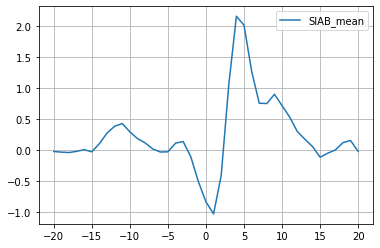

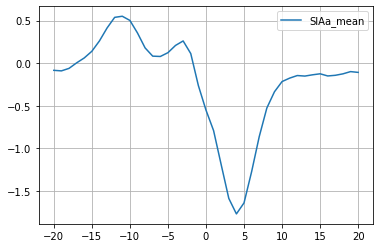

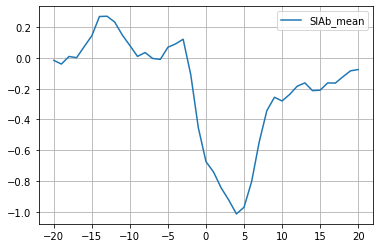

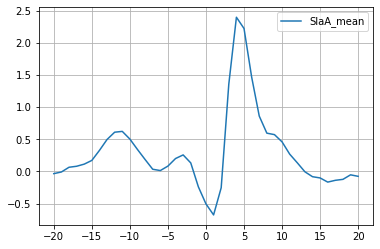

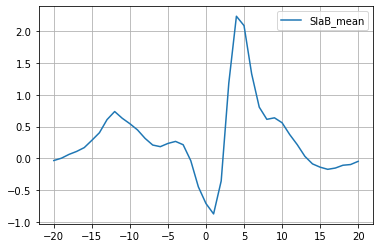

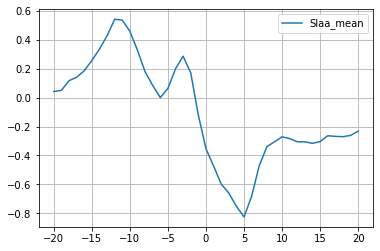

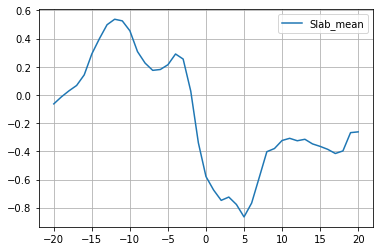

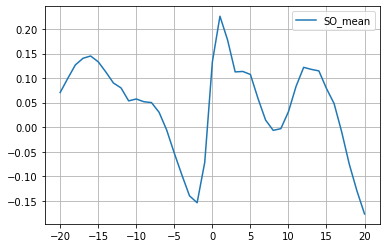

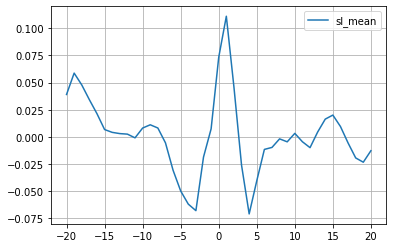

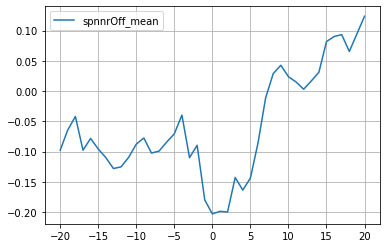

In [8]:
import matplotlib.pyplot as plt
for foc in final_out.columns:
    if 'mean' in foc:
        plt.figure()
        final_out[foc].plot(label=foc)
        plt.legend()
        plt.grid()